In [1]:
import pandas as pd
import numpy as np


In [4]:
dataset=pd.read_csv("../Data/Odi_bating.csv")

In [9]:
print(dataset.head(5))

  Player Name  Mat Inns NO Runs  HS Ave  BF     SR 100 50  0 4s 6s  \
0  A Athanaze    3    3  0   60  32  20  77  77.92   0  0  0  6  1   
1  A Athanaze    1    1  0    0   0   0   1      0   0  0  1  0  0   
2  A Athanaze    1    1  0    4   4   4   2    200   0  0  0  1  0   
3     A Bagai    1    1  0   10  10  10  24  41.66   0  0  0  0  0   
4     A Bagai    1    1  0   16  16  16  35  45.71   0  0  0  2  0   

  Opposition Team  
0           India  
1        Zimbabwe  
2     West Indies  
3        Scotland  
4        Pakistan  


In [10]:
df=dataset


In [11]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print the number of missing values in each column
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Player Name        0
Mat                0
Inns               0
NO                 0
Runs               1
HS                 0
Ave                0
BF                 0
SR                 0
100                0
50                 0
0                  0
4s                 0
6s                 0
Opposition Team    0
dtype: int64


In [12]:
# Drop rows with missing values in the "Runs" column
df.dropna(subset=['Runs'], inplace=True)

In [13]:
# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [14]:
print(df.isnull().sum())

Player Name        0
Mat                0
Inns               0
NO                 0
Runs               0
HS                 0
Ave                0
BF                 0
SR                 0
100                0
50                 0
0                  0
4s                 0
6s                 0
Opposition Team    0
dtype: int64


In [18]:
df.replace('Nan', 0, inplace=True)
df.replace('-', 0, inplace=True)

In [23]:
print("Data Types:")
print(df.dtypes)

Data Types:
Player Name        object
Mat                 int64
Inns               object
NO                 object
Runs               object
HS                 object
Ave                object
BF                 object
SR                 object
100                object
50                 object
0                  object
4s                 object
6s                 object
Opposition Team    object
dtype: object


In [24]:
# Convert selected columns to numeric data types
numeric_columns = ['Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100', '50', '0', '4s', '6s']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check data types again
print(df.dtypes)


Player Name         object
Mat                  int64
Inns                 int64
NO                   int64
Runs                 int64
HS                 float64
Ave                float64
BF                   int64
SR                 float64
100                  int64
50                   int64
0                    int64
4s                   int64
6s                   int64
Opposition Team     object
dtype: object


In [ ]:
#EDA

In [ ]:
#visbualizing the distribution of numeric variables like 'Runs', 'Ave' (average), 'BF' (balls faced), and 'SR' (strike rate). We can create histograms for each of these variables to understand their distributions.

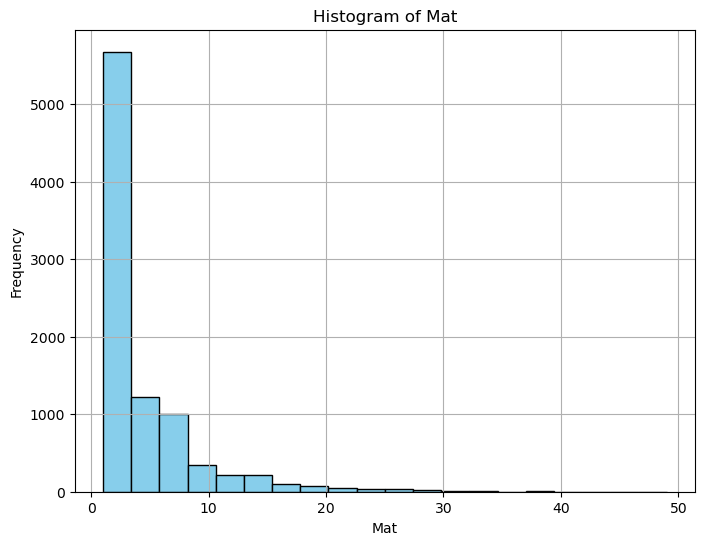

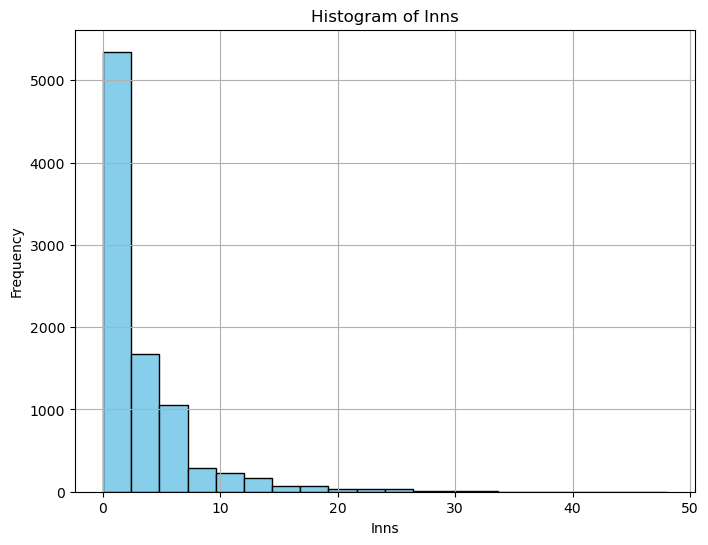

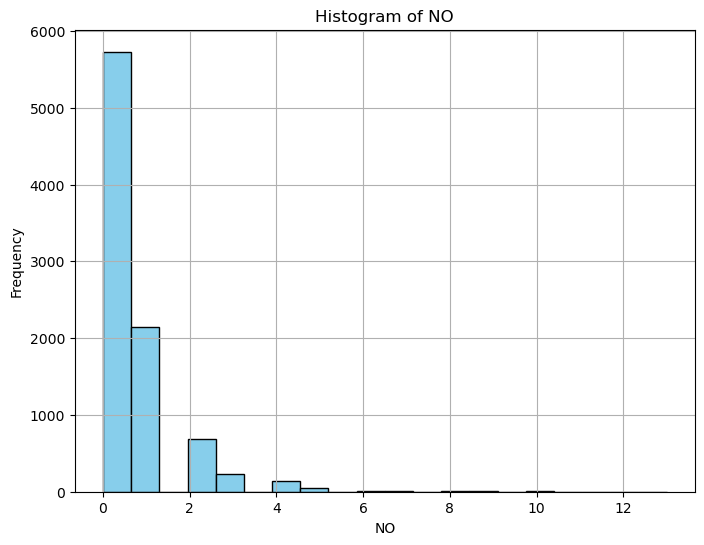

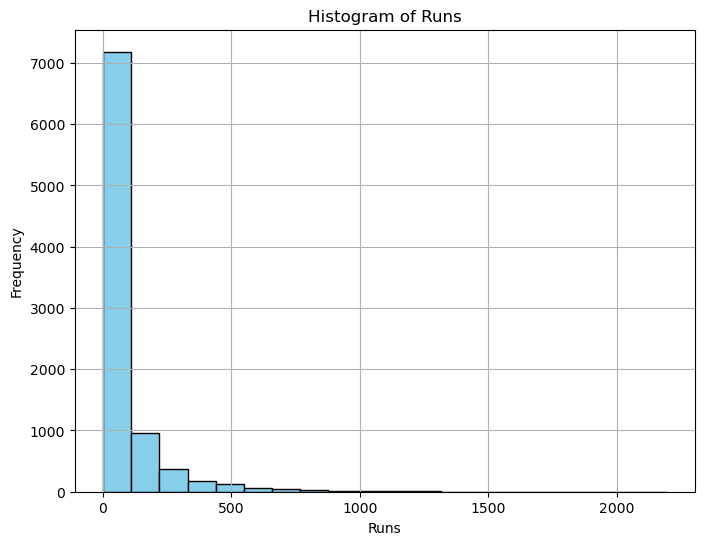

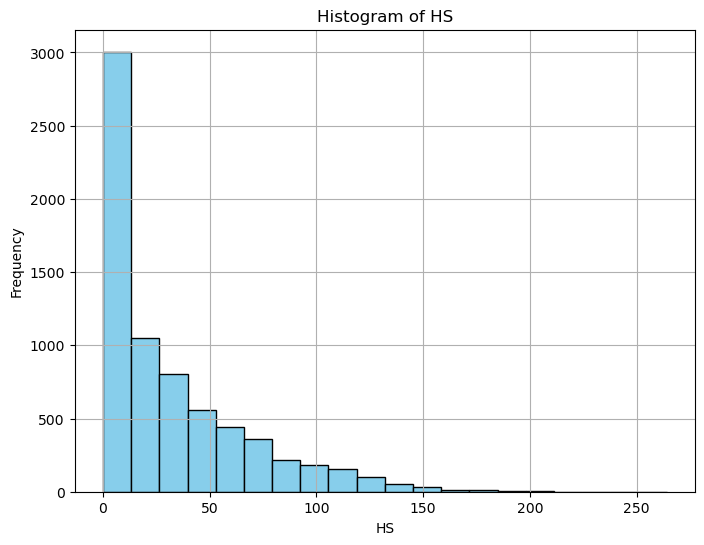

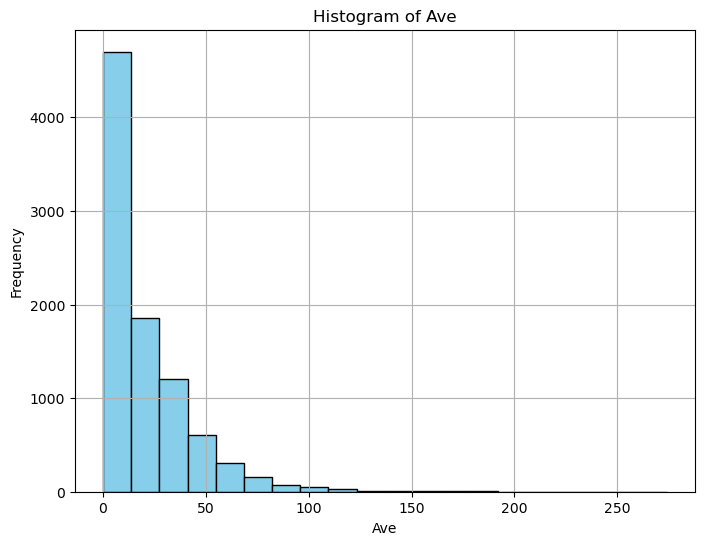

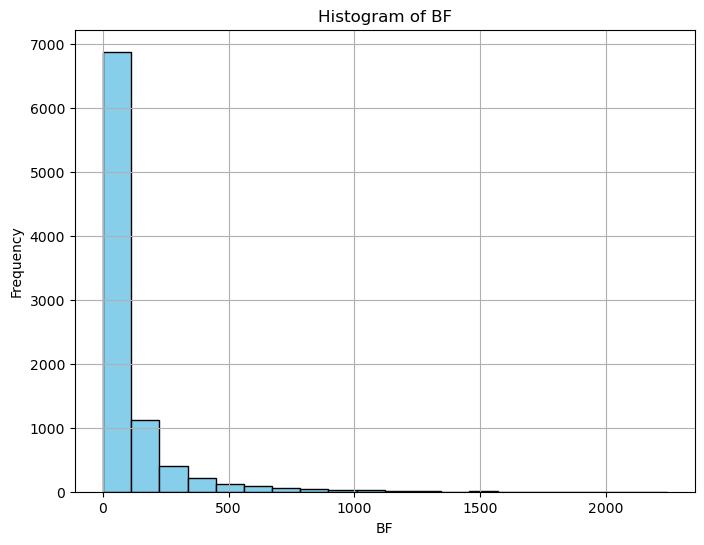

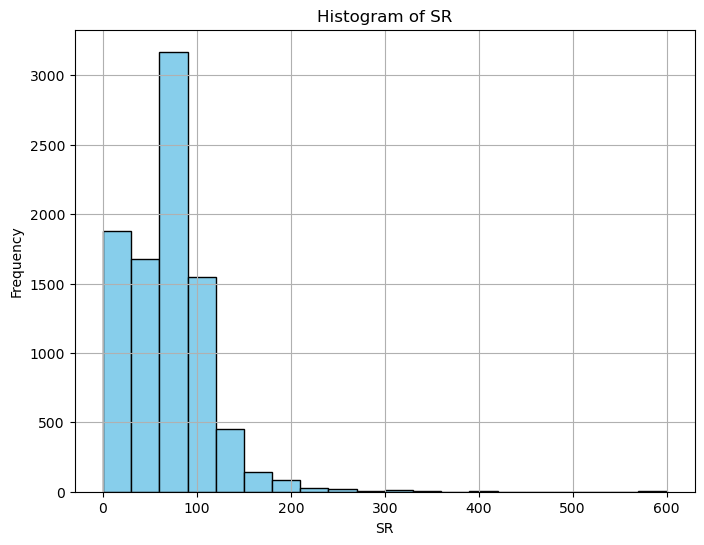

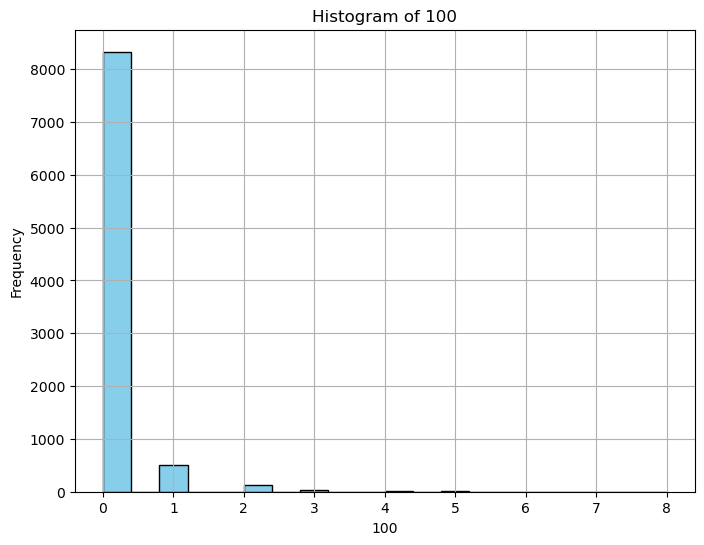

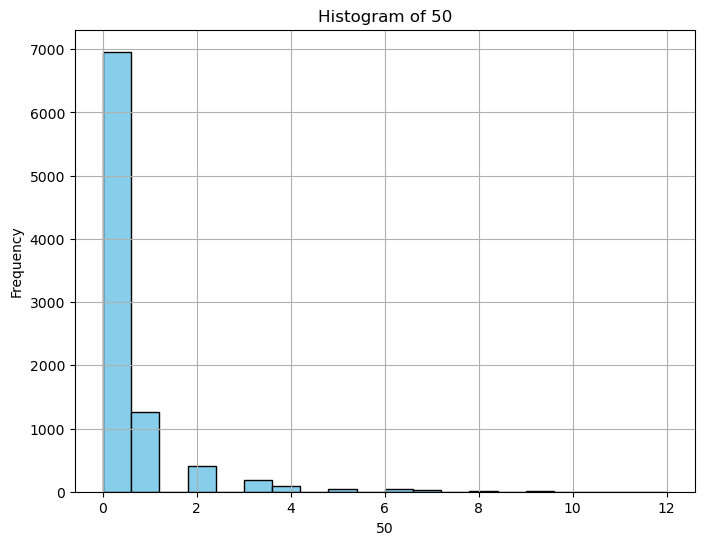

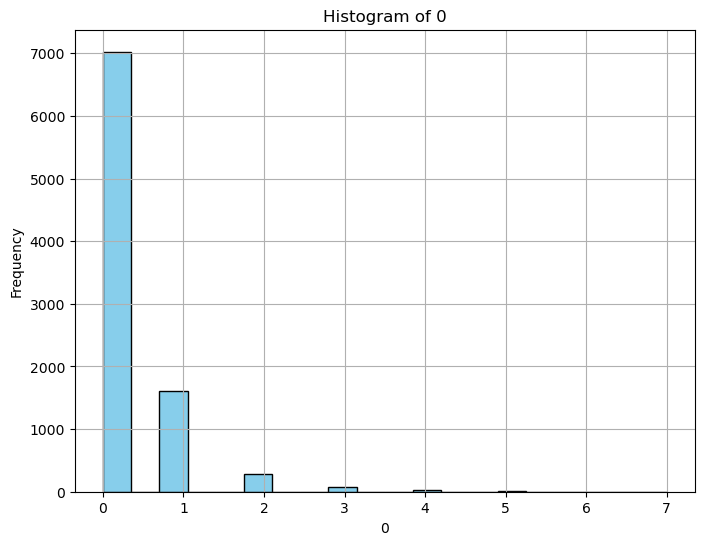

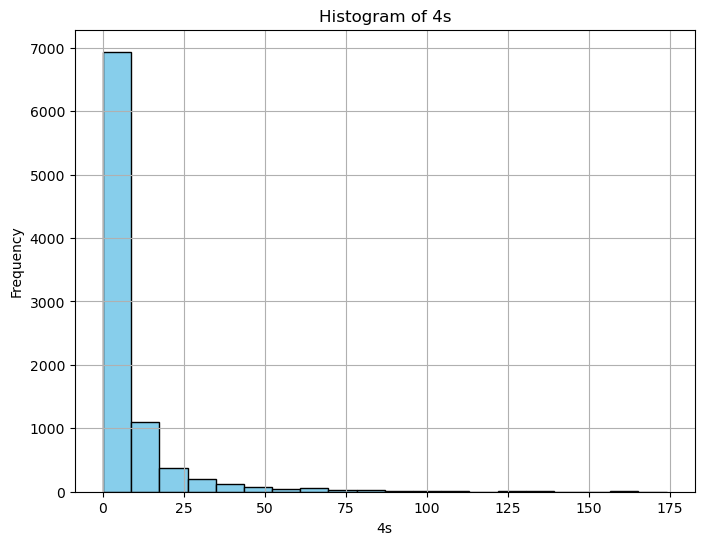

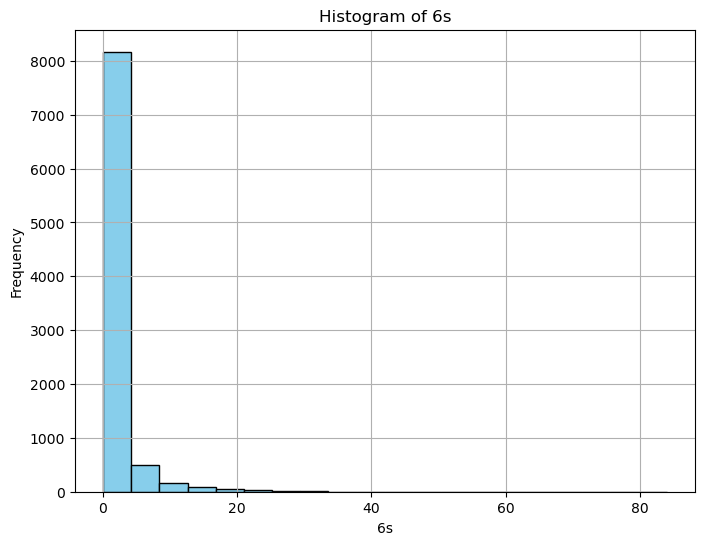

In [27]:
import matplotlib.pyplot as plt

# Selecting only the numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Creating histograms for each numeric column
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [ ]:
#Scatter plot for the relationship between "Runs" and "Strike Rate":

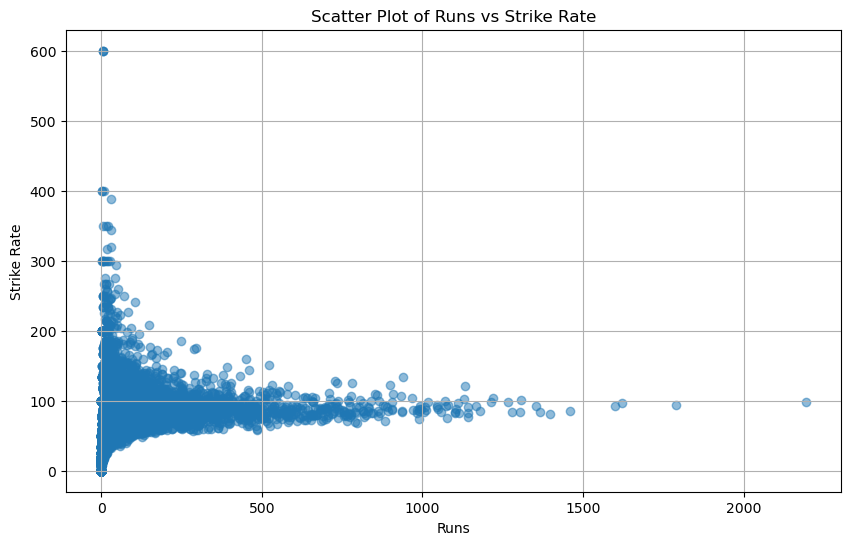

In [25]:

plt.figure(figsize=(10, 6))
plt.scatter(df['Runs'], df['SR'], alpha=0.5)
plt.title('Scatter Plot of Runs vs Strike Rate')
plt.xlabel('Runs')
plt.ylabel('Strike Rate')
plt.grid(True)
plt.show()


C:\Users\prana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


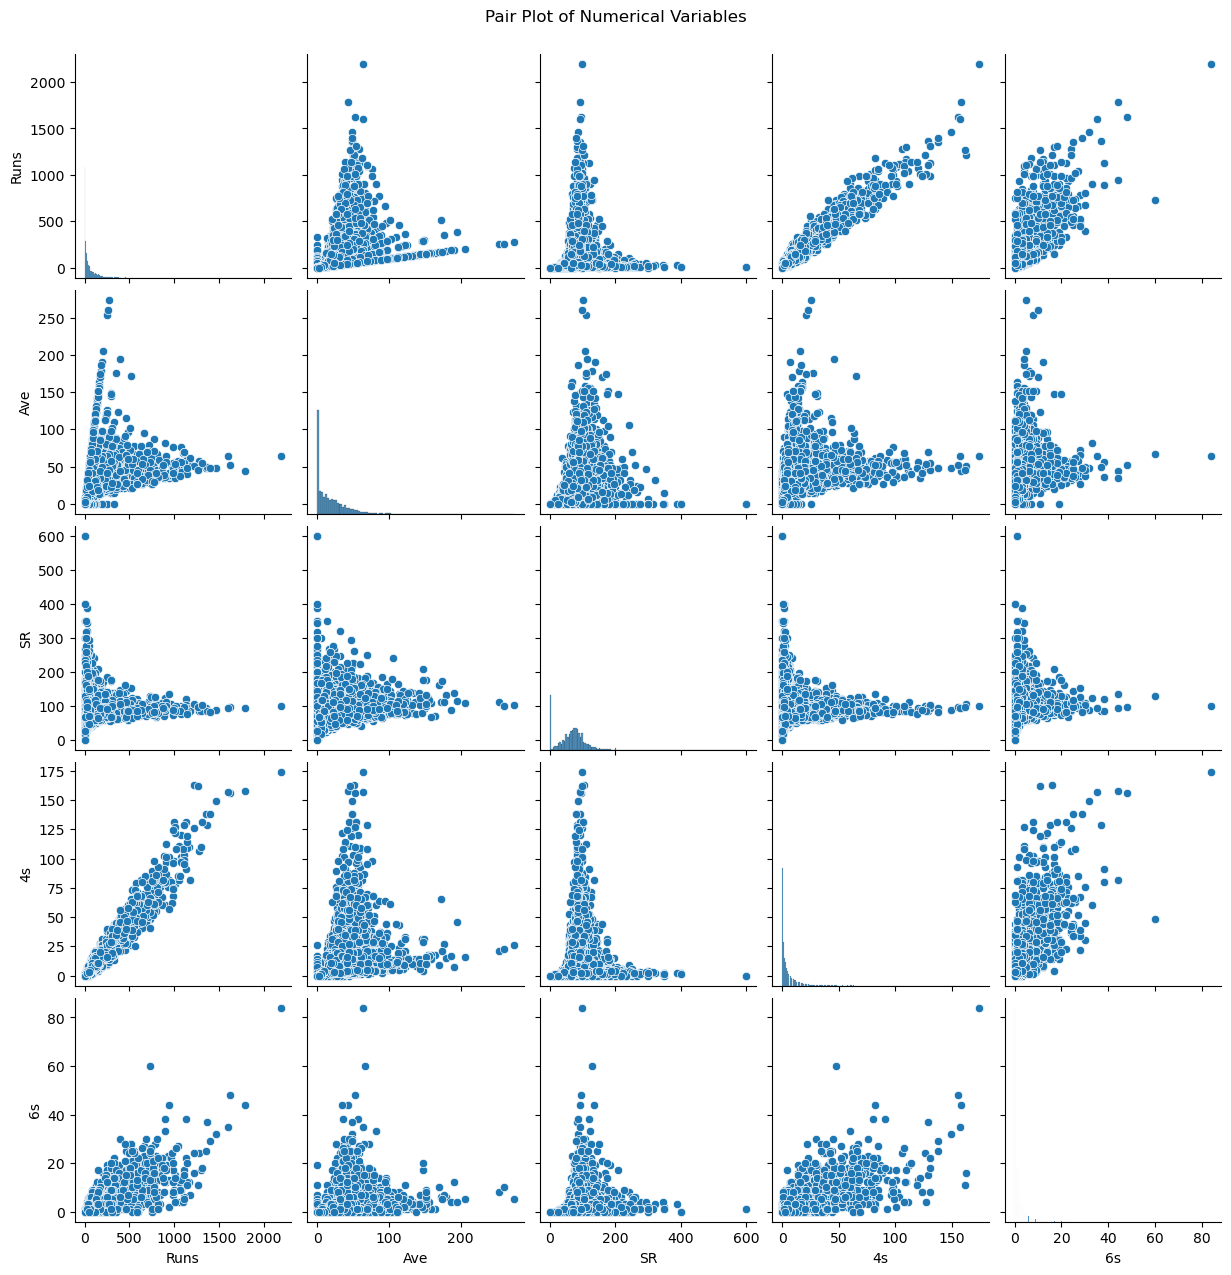

In [28]:
import seaborn as sns

# Selecting numerical variables
numerical_vars = ['Runs', 'Ave', 'SR', '4s', '6s']

# Creating pair plot
sns.pairplot(df[numerical_vars])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


In [ ]:
#Correration matrix

In [33]:
numerical_columns = ['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100', '50', '0', '4s', '6s']

In [34]:
correlation_matrix = df[numerical_columns].corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
           Mat      Inns        NO      Runs        HS       Ave        BF  \
Mat   1.000000  0.948547  0.595091  0.784948  0.531332  0.224646  0.794010   
Inns  0.948547  1.000000  0.525819  0.876661  0.618869  0.295196  0.889593   
NO    0.595091  0.525819  1.000000  0.364083  0.235282  0.172249  0.350270   
Runs  0.784948  0.876661  0.364083  1.000000  0.764149  0.484557  0.983722   
HS    0.531332  0.618869  0.235282  0.764149  1.000000  0.813771  0.742898   
Ave   0.224646  0.295196  0.172249  0.484557  0.813771  1.000000  0.455147   
BF    0.794010  0.889593  0.350270  0.983722  0.742898  0.455147  1.000000   
SR    0.182468  0.220391  0.197676  0.241003  0.534751  0.407119  0.190030   
100   0.447651  0.513870  0.185052  0.742058  0.617485  0.409391  0.693618   
50    0.651056  0.734685  0.294352  0.873602  0.653296  0.441162  0.869777   
0     0.465818  0.459968  0.222781  0.264237  0.158020 -0.036504  0.276853   
4s    0.746230  0.840961  0.309989  0.973110

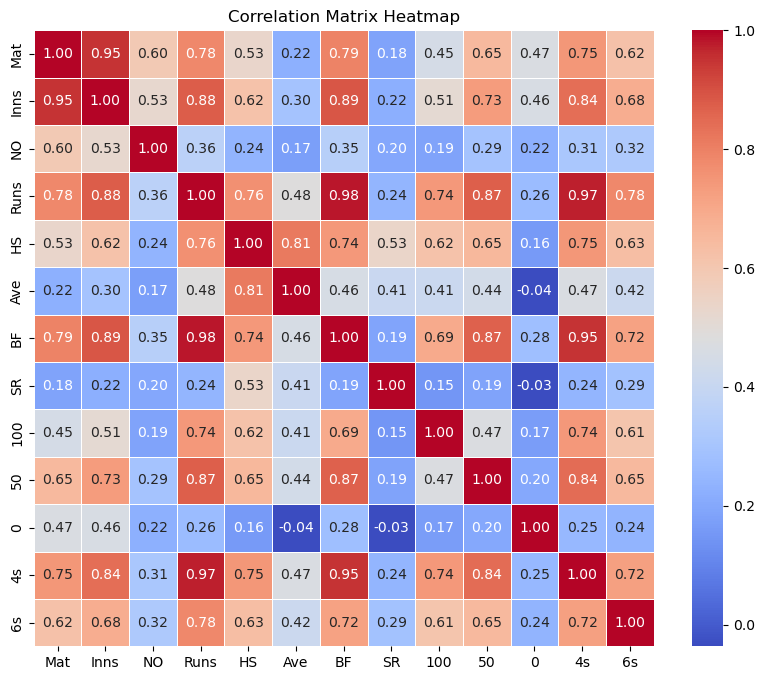

In [35]:
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
#Analysis of Categorical Variables:

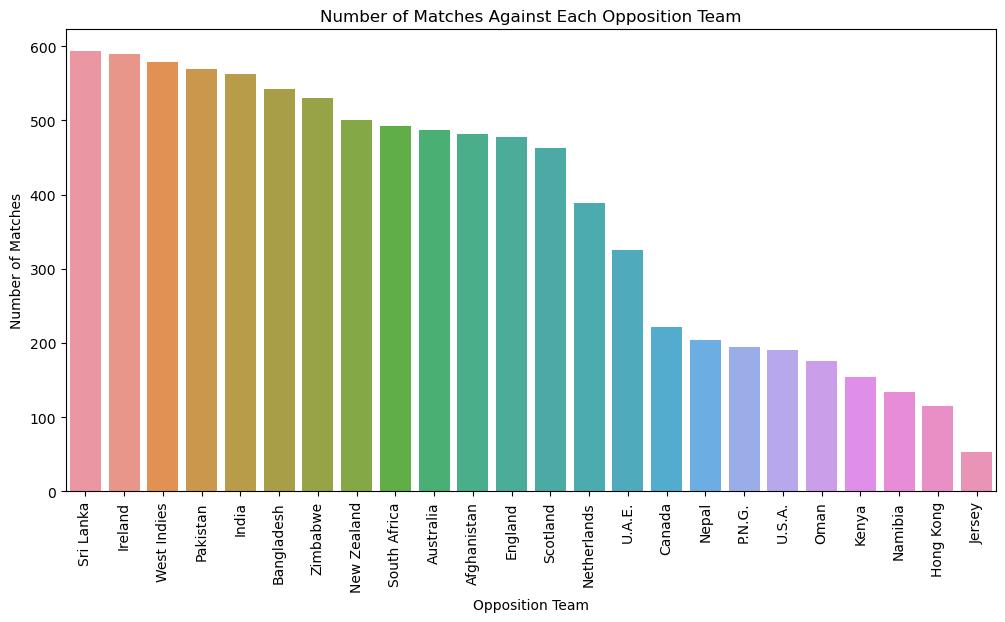

In [36]:
# Count plot for 'Opposition Team'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Opposition Team', order=df['Opposition Team'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Matches Against Each Opposition Team')
plt.xlabel('Opposition Team')
plt.ylabel('Number of Matches')
plt.show()


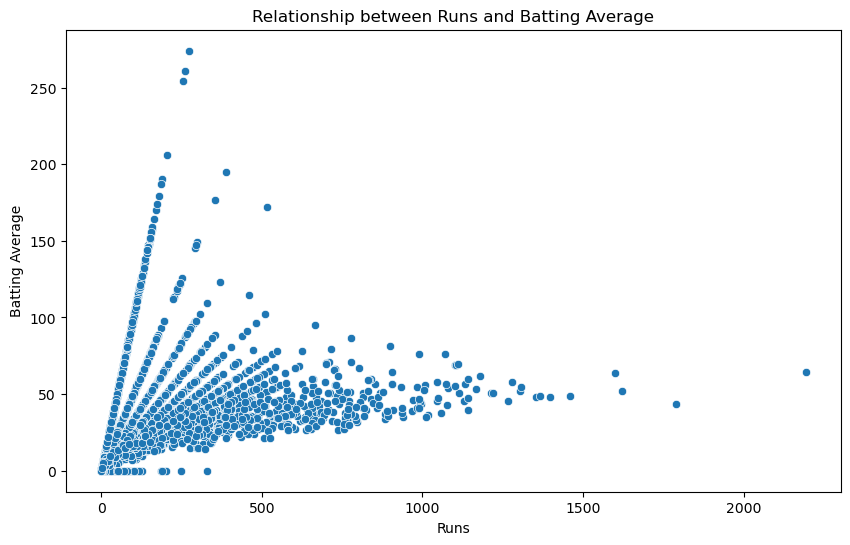

In [38]:
# Scatter plot between 'Runs' and 'Ave' (Batting Average)
# Relationship Between Variables:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Runs', y='Ave')
plt.title('Relationship between Runs and Batting Average')
plt.xlabel('Runs')
plt.ylabel('Batting Average')
plt.show()


In [ ]:
# Number of players in differnt teams who played the matches

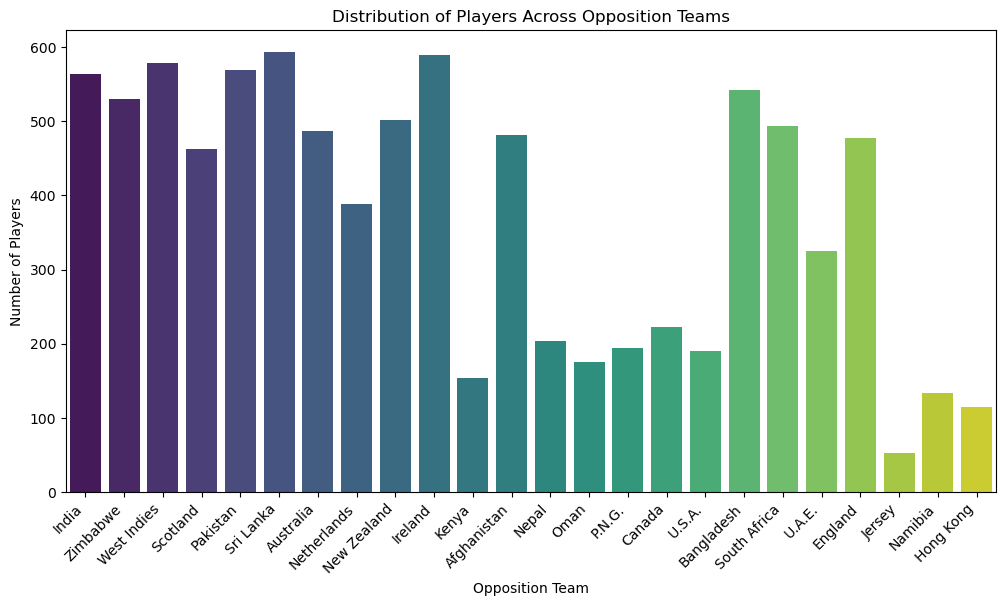

In [39]:
# Count plot for 'Opposition Team'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Opposition Team', palette='viridis')
plt.title('Distribution of Players Across Opposition Teams')
plt.xlabel('Opposition Team')
plt.ylabel('Number of Players')
plt.xticks(rotation=45, ha='right')
plt.show()


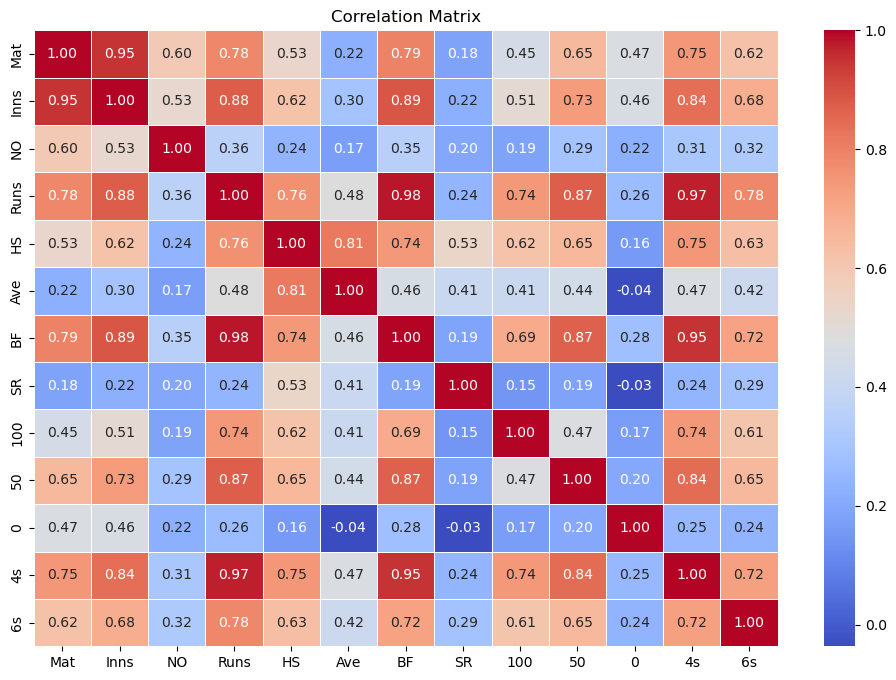

In [41]:
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [44]:
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


           Mat      Inns        NO      Runs        HS       Ave        BF  \
Mat   1.000000  0.948547  0.595091  0.784948  0.531332  0.224646  0.794010   
Inns  0.948547  1.000000  0.525819  0.876661  0.618869  0.295196  0.889593   
NO    0.595091  0.525819  1.000000  0.364083  0.235282  0.172249  0.350270   
Runs  0.784948  0.876661  0.364083  1.000000  0.764149  0.484557  0.983722   
HS    0.531332  0.618869  0.235282  0.764149  1.000000  0.813771  0.742898   
Ave   0.224646  0.295196  0.172249  0.484557  0.813771  1.000000  0.455147   
BF    0.794010  0.889593  0.350270  0.983722  0.742898  0.455147  1.000000   
SR    0.182468  0.220391  0.197676  0.241003  0.534751  0.407119  0.190030   
100   0.447651  0.513870  0.185052  0.742058  0.617485  0.409391  0.693618   
50    0.651056  0.734685  0.294352  0.873602  0.653296  0.441162  0.869777   
0     0.465818  0.459968  0.222781  0.264237  0.158020 -0.036504  0.276853   
4s    0.746230  0.840961  0.309989  0.973110  0.747073  0.465597

In [ ]:
# Feature Engineering

In [46]:
#Creating new features

In [ ]:
# 1.calculating the average runs scored by each player against each opponent team.
# 2. calculating the strike rate against specific opponent teams for each player.
### Group the data by 'Player Name' and 'Opposition Team'.
### Calculate the mean of the 'SR' (strike rate) column for each group.
### Create a new feature/column to store these strike rates.
# 3.Performance Consistency Against Opponent.
  ### we'll calculate the standard deviation of runs scored (batting) or wickets taken (bowling) across multiple matches against the same opponent.
    ###This will give us an indication of how consistent a player's performance has been against a particular opponent.

In [65]:

# Step 1: Average Runs Against Specific Opponent
average_runs = df.groupby(['Player Name', 'Opposition Team'])['Runs'].mean().reset_index()
average_runs = average_runs.rename(columns={'Runs': 'Average Runs'})
df = pd.merge(df, average_runs, on=['Player Name', 'Opposition Team'], how='left')

# Step 2: Average Strike Rate Against Specific Opponent
average_sr = df.groupby(['Player Name', 'Opposition Team'])['SR'].mean().reset_index()
average_sr = average_sr.rename(columns={'SR': 'Average SR'})
df = pd.merge(df, average_sr, on=['Player Name', 'Opposition Team'], how='left')

# Step 3: Performance Consistency Against Opponent
performance_consistency = df.groupby(['Player Name', 'Opposition Team'])['Runs'].std().reset_index()
performance_consistency = performance_consistency.rename(columns={'Runs': 'Performance Consistency'})
performance_consistency.fillna(0, inplace=True)  # Fill missing values with zero
df = pd.merge(df, performance_consistency, on=['Player Name', 'Opposition Team'], how='left')

# Step 4: Head-to-Head Performance Comparison (assuming we have data for both players)
# Calculate the difference in averages and strike rates between players facing the same opponent team
df['Average Runs Diff'] = df.groupby(['Opposition Team'])['Average Runs'].diff()
df['Average SR Diff'] = df.groupby(['Opposition Team'])['Average SR'].diff()

# Fill missing values in the differences columns with zeros
df['Average Runs Diff'].fillna(0, inplace=True)
df['Average SR Diff'].fillna(0, inplace=True)

# Display the updated DataFrame
print(df.head())


  Player Name  Mat  Inns  NO  Runs    HS   Ave  BF      SR  100  ...  \
0  A Athanaze    3     3   0    60  32.0  20.0  77   77.92    0  ...   
1  A Athanaze    1     1   0     0   0.0   0.0   1    0.00    0  ...   
2  A Athanaze    1     1   0     4   4.0   4.0   2  200.00    0  ...   
3     A Bagai    1     1   0    10  10.0  10.0  24   41.66    0  ...   
4     A Bagai    1     1   0    16  16.0  16.0  35   45.71    0  ...   

   Average SR_x  Performance Consistency_x  Average Runs_y  Average SR_y  \
0         77.92                        NaN            60.0         77.92   
1          0.00                        NaN             0.0          0.00   
2        200.00                        NaN             4.0        200.00   
3         41.66                        NaN            10.0         41.66   
4         45.71                        NaN            16.0         45.71   

  Performance Consistency_y  Average Runs  Average SR  \
0                       0.0          60.0       77.92

In [ ]:
#Encode categorical variables and scale numerical features.
###Encoding categorical variables is necessary to convert them into a numerical format that machine learning algorithms can understand. Scaling numerical features ensures that all features are on the same scale,
### preventing features with larger values from dominating the model.

In [95]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate categorical and numerical columns
categorical_cols = ['Player Name', 'Opposition Team']
numerical_cols = ['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100', '50', '0', '4s', '6s', 'Performance Consistency']

# Create transformers for encoding categorical variables and scaling numerical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

# Combine transformers into a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])



In [96]:
# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
transformed_data = pipeline.fit_transform(df1)


In [ ]:
# using regrsseion
not used now

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# # Assuming X_train, X_test, y_train, y_test are preprocessed features and target variable
# X_train, X_test, Y_train, Y_test = train_test_split(transformed_data, target_variable, test_size=0.2, random_state=42)
# # Initialize and train a linear regression model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model using mean squared error (MSE)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)


In [76]:
df1=df

In [97]:
# Define the threshold for the target variable
threshold = 50

# Create the binary target variable
df1['Above_Threshold'] = df1['Runs'].apply(lambda x: 1 if x >= threshold else 0)

# Check the distribution of the target variable
print(df1['Above_Threshold'].value_counts())


Above_Threshold
0    4
1    2
Name: count, dtype: int64


C:\Users\prana\AppData\Local\Temp\ipykernel_15256\373037944.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Above_Threshold'] = df1['Runs'].apply(lambda x: 1 if x >= threshold else 0)


In [ ]:
#rain_test_split

In [98]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = transformed_data
y = df1['Above_Threshold']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (4, 19) (4,)
Testing set shape: (2, 19) (2,)


In [99]:
df1

,Player Name,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,...,Performance Consistency_x,Average Runs_y,Average SR_y,Performance Consistency_y,Average Runs,Average SR,Performance Consistency,Average Runs Diff,Average SR Diff,Above_Threshold
3949,Junaid Siddique,1,1,0,25,25.0,25.00,27,92.59,0,...,12.020815,16.5,82.655,12.020815,16.5,82.655,12.020815,14.5,71.545,0
3956,Junaid Siddique,3,3,0,116,100.0,38.66,147,78.91,1,...,77.781746,61.0,114.455,77.781746,61.0,114.455,77.781746,59.0,74.455,1
3961,Junaid Siddique,1,1,0,6,6.0,6.00,4,150.00,0,...,77.781746,61.0,114.455,77.781746,61.0,114.455,77.781746,0.0,0.000,0
3964,Junaid Siddique,2,2,0,8,8.0,4.00,11,72.72,0,...,12.020815,16.5,82.655,12.020815,16.5,82.655,12.020815,0.0,0.000,0
5476,Mohammad Shahzad,9,9,1,407,0.0,50.87,409,99.51,1,...,253.144228,228.0,87.445,253.144228,228.0,87.445,253.144228,182.0,0.655,1
5480,Mohammad Shahzad,2,2,0,49,28.0,24.50,65,75.38,0,...,253.144228,228.0,87.445,253.144228,228.0,87.445,253.144228,0.0,0.000,0


In [93]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the training data
imputer.fit(X_train)

# Transform the training and testing data
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [ ]:
#Logistic Regression model

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the Logistic Regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Accuracy:", accuracy_logreg)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [86]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Separate categorical and numerical columns
categorical_cols = ['Player Name', 'Opposition Team']
numerical_cols = ['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100', '50', '0', '4s', '6s', 'Performance Consistency']

# Create transformers for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Create transformers for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the pipeline including the preprocessor and the model
pipeline_logreg = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', LogisticRegression())])

# Fit the pipeline to the training data
pipeline_logreg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_logreg = pipeline_logreg.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Accuracy:", accuracy_logreg)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))


ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [82]:
# Initialize Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy:", accuracy_logistic)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [90]:
# Drop rows with missing values in the 'Performance Consistency_x' column
df1 = df1.dropna(subset=['Performance Consistency_x'])

# Check if missing values are removed
missing_values_after_deletion = df1.isnull().sum()
print("Missing values after deletion:")
print(missing_values_after_deletion)


Missing values after deletion:
Player Name                  0
Mat                          0
Inns                         0
NO                           0
Runs                         0
HS                           0
Ave                          0
BF                           0
SR                           0
100                          0
50                           0
0                            0
4s                           0
6s                           0
Opposition Team              0
Average Runs_x               0
Average SR_x                 0
Performance Consistency_x    0
Average Runs_y               0
Average SR_y                 0
Performance Consistency_y    0
Average Runs                 0
Average SR                   0
Performance Consistency      0
Average Runs Diff            0
Average SR Diff              0
Above_Threshold              0
dtype: int64


In [91]:
df1

,Player Name,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,...,Performance Consistency_x,Average Runs_y,Average SR_y,Performance Consistency_y,Average Runs,Average SR,Performance Consistency,Average Runs Diff,Average SR Diff,Above_Threshold
3949,Junaid Siddique,1,1,0,25,25.0,25.00,27,92.59,0,...,12.020815,16.5,82.655,12.020815,16.5,82.655,12.020815,14.5,71.545,0
3956,Junaid Siddique,3,3,0,116,100.0,38.66,147,78.91,1,...,77.781746,61.0,114.455,77.781746,61.0,114.455,77.781746,59.0,74.455,1
3961,Junaid Siddique,1,1,0,6,6.0,6.00,4,150.00,0,...,77.781746,61.0,114.455,77.781746,61.0,114.455,77.781746,0.0,0.000,0
3964,Junaid Siddique,2,2,0,8,8.0,4.00,11,72.72,0,...,12.020815,16.5,82.655,12.020815,16.5,82.655,12.020815,0.0,0.000,0
5476,Mohammad Shahzad,9,9,1,407,0.0,50.87,409,99.51,1,...,253.144228,228.0,87.445,253.144228,228.0,87.445,253.144228,182.0,0.655,1
5480,Mohammad Shahzad,2,2,0,49,28.0,24.50,65,75.38,0,...,253.144228,228.0,87.445,253.144228,228.0,87.445,253.144228,0.0,0.000,0
